# Understanding Images Using Tensorflow

https://www.tensorflow.org/beta/tutorials/load_data/images

You will need these skills!  What is an image, tf.Example, serialized example etc.  
You won't get far with served models without this understanding.

## TensorFlow 2.0 Beta

In [9]:
import os, pathlib
import random
import IPython.display as display

import matplotlib.pyplot as plt

!pip install -q tensorflow==2.0.0-beta1
# you'll get a tensorflow-serving-api error

import tensorflow as tf

tensorflow-serving-api 1.14.0 has requirement tensorflow~=1.14.0, but you'll have tensorflow 2.0.0b1 which is incompatible.
You are using pip version 10.0.1, however version 19.2.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [10]:
# you really need TensorFlow 2.0.x
tf.__version__

'2.0.0-beta1'

## Globals

you can get some test images from S3 - look for cfa_products / test_images  
There is also a test.tfrecord (that was created as a slice of the train/val split)

In [2]:
PROJECT_DIR = os.getcwd()
IMAGE_DIR = os.path.join(PROJECT_DIR, "data/new_jpeg_images")

MODEL_PATH = os.path.join(PROJECT_DIR, "trained_model/export/Servo/1564778509")
LABEL_MAP = os.path.join(PROJECT_DIR, "code/cfa_prod_label_map.pbtxt")

# you can get data using the TrainModel_Step1_Local notebook
TEST_TFRECORDS_PATH =  os.path.join(PROJECT_DIR, "code/tfrecords/test/")
                                    
SAMPLE_IMAGE = os.path.join(PROJECT_DIR, "data/new_jpeg_images/20190710_variety_1562781002.jpg")


In [3]:
data_root = pathlib.Path(IMAGE_DIR)
for item in data_root.iterdir():
  print(item)

/home/ec2-user/SageMaker/ssd-dag/data/new_jpeg_images/20190710_variety_1562781002.jpg
/home/ec2-user/SageMaker/ssd-dag/data/new_jpeg_images/20190710_variety_1562781073.jpg
/home/ec2-user/SageMaker/ssd-dag/data/new_jpeg_images/20190710_variety_1562781083.jpg
/home/ec2-user/SageMaker/ssd-dag/data/new_jpeg_images/20190710_variety_1562781103.jpg
/home/ec2-user/SageMaker/ssd-dag/data/new_jpeg_images/20190710_variety_1562781041.jpg
/home/ec2-user/SageMaker/ssd-dag/data/new_jpeg_images/.gitkeep
/home/ec2-user/SageMaker/ssd-dag/data/new_jpeg_images/20190710_variety_1562781028.jpg
/home/ec2-user/SageMaker/ssd-dag/data/new_jpeg_images/20190710_variety_1562781094.jpg
/home/ec2-user/SageMaker/ssd-dag/data/new_jpeg_images/20190710_variety_1562781056.jpg
/home/ec2-user/SageMaker/ssd-dag/data/new_jpeg_images/20190710_variety_1562781033.jpg
/home/ec2-user/SageMaker/ssd-dag/data/new_jpeg_images/20190710_variety_1562781032.jpg
/home/ec2-user/SageMaker/ssd-dag/data/new_jpeg_images/20190710_variety_156278

In [4]:
# opmit .gitkeep here with a glob
all_image_paths = list(data_root.glob('*.jpg'))
all_image_paths = [str(path) for path in all_image_paths]

# randomize the order
random.shuffle(all_image_paths)

image_count = len(all_image_paths)
image_count

117

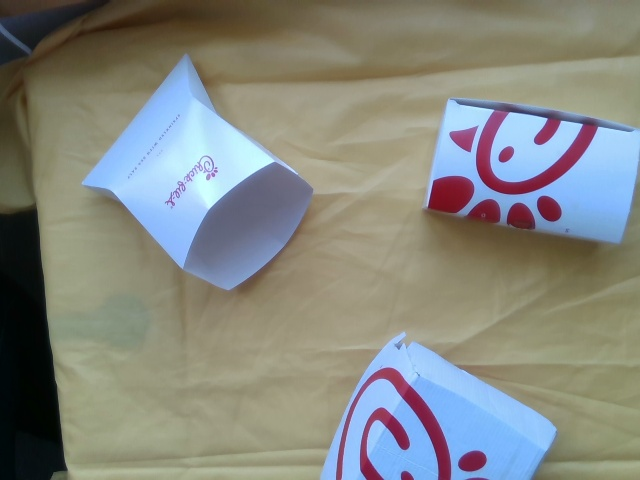

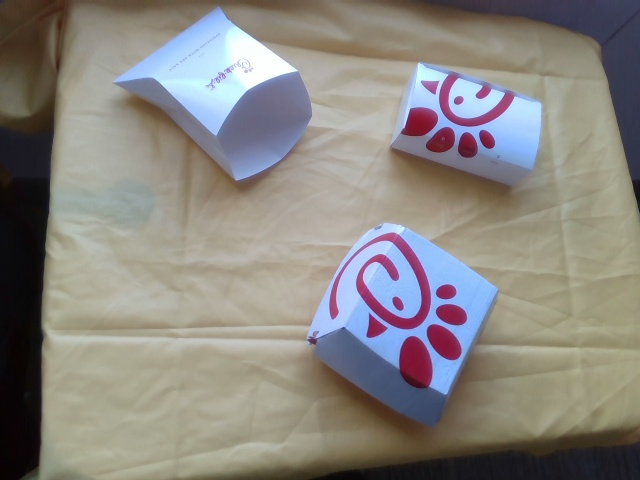

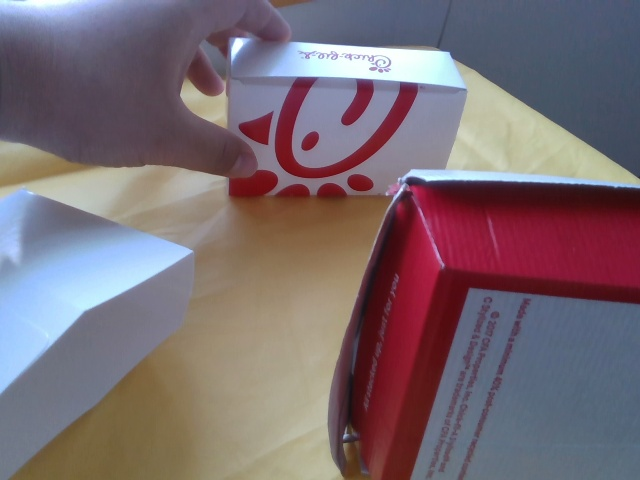

In [5]:
for n in range(3):
  image_path = random.choice(all_image_paths)
  display.display(display.Image(image_path))


## TensorFlow Utilities
the tutorial sez:  
##### TensorFlow includes all the tools you need to load and process images:

img_path: /home/ec2-user/SageMaker/ssd-dag/data/new_jpeg_images/20190710_variety_1562781059.jpg


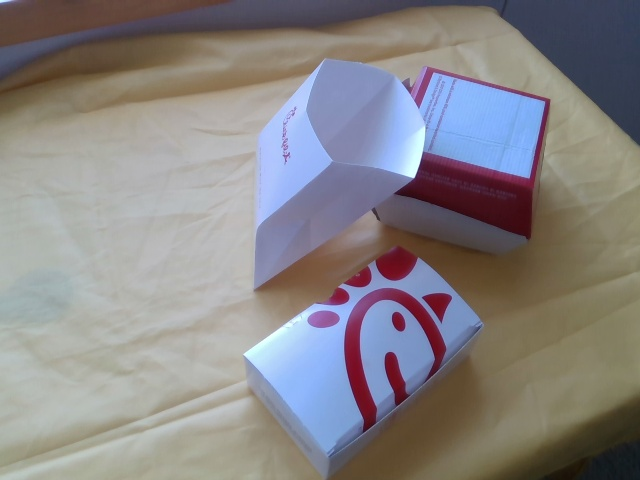

In [6]:
img_path = all_image_paths[0]
print ("img_path:", img_path)
display.display(display.Image(img_path))

In [7]:
img_raw = tf.io.read_file(img_path)
print ("img_raw type:", type(img_raw))
print(repr(img_raw)[:100]+"...")

img_raw type: <class 'tensorflow.python.framework.ops.EagerTensor'>
<tf.Tensor: id=1, shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x...


In [8]:
img_tensor = tf.image.decode_image(img_raw)

print(img_tensor.shape)
print(img_tensor.dtype)

(480, 640, 3)
<dtype: 'uint8'>


In [9]:
img_final = tf.image.resize(img_tensor, [300, 300])
img_final = img_final/255.0
print(img_final.shape)
print(img_final.numpy().min())
print(img_final.numpy().max())

(300, 300, 3)
0.009450973
1.0


## Define Functions

In [6]:
def preprocess_image(image):
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.resize(image, [192, 192])
  image /= 255.0  # normalize to [0,1] range

  return image

In [7]:
def load_and_preprocess_image(path):
  image = tf.io.read_file(path)
  return preprocess_image(image)

In [8]:


image_path = all_image_paths[0]
label = all_image_labels[0]

plt.imshow(load_and_preprocess_image(img_path))
plt.grid(False)
plt.xlabel(caption_image(img_path))
plt.title(label_names[label].title())
print()

NameError: name 'all_image_paths' is not defined